In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

from io import BytesIO
import os
os.chdir("../")

In [3]:
os.getcwd()

'/mnt/g/ubuntu/Projects/CartoonGAN-Test-Pytorch-Torch'

In [78]:
import argparse
import base64
import matplotlib.pyplot as plt
# import numpy as np
import requests
import torch
# import torchvision.transforms as transforms
import torchvision.utils as vutils  

from PIL import Image
# from torch.autograd import Variable
from network.Transformer import Transformer
from tqdm.notebook import tqdm
from test_from_code import transform 


In [14]:
styles = ["Hosoda", "Hayao", "Shinkai", "Paprika"]
models = {}

for style in tqdm(styles):
    model = Transformer()
    model.load_state_dict(torch.load(os.path.join( os.getcwd(),"pretrained_model", style + "_net_G_float.pth")))
    model.eval()
    models[style] = model

  0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
path = "/mnt/g/ubuntu/Projects/CartoonGAN-Test-Pytorch-Torch/test_img/7--136.jpg"
path = "/mnt/g/ubuntu/Projects/CartoonGAN-Test-Pytorch-Torch/test_img/6--267.jpg"

In [18]:
%%time
output300 = transform(models, "Hosoda", path ,load_size=300)

Inferenc time taken: 1.667480230331421 s
CPU times: user 5.94 s, sys: 1.11 s, total: 7.04 s
Wall time: 1.99 s


/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


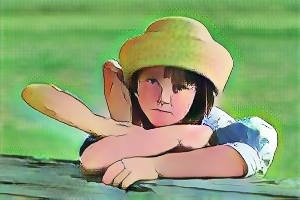

In [19]:
output300

Hosoda - Inference time taken: 3.9091315269470215 s
Hayao - Inference time taken: 3.615086078643799 s
Shinkai - Inference time taken: 3.673253059387207 s
Paprika - Inference time taken: 3.8736653327941895 s


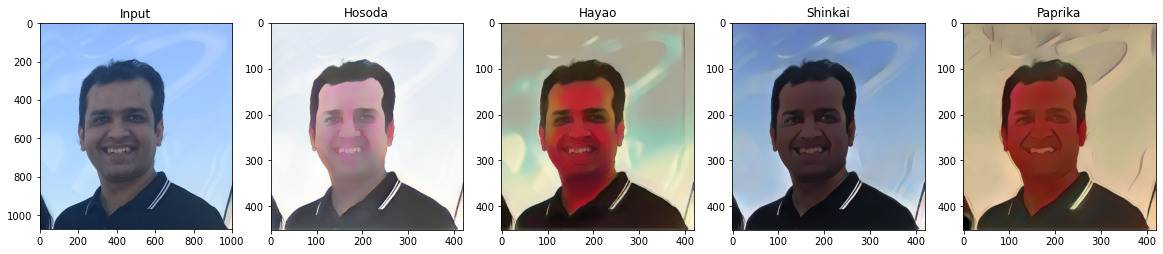

In [81]:
path = "/mnt/g/ubuntu/Projects/CartoonGAN-Test-Pytorch-Torch/test_img/sgm.jpg"

fig = plt.figure(figsize=(20,10))
rows = 1
columns = 5
input_image_pos = 1
# print(len(output_processed_images) / columns + 1)
ax = plt.subplot(rows, columns, input_image_pos)
ax.set_title("Input")
plt.imshow( Image.open(path).convert("RGB"))

output_processed_images=[]
for i, style in enumerate(styles):
    # print(style)
    image = transform(models, style, path ,load_size=450)
    output_processed_images.append(image)
    ax = plt.subplot(rows, columns, input_image_pos + i + 1)
    ax.set_title(style)
    plt.imshow(image)

Shinkai - Inference time taken: 3.8117644786834717 s
CPU times: user 14.1 s, sys: 1.24 s, total: 15.3 s
Wall time: 3.87 s


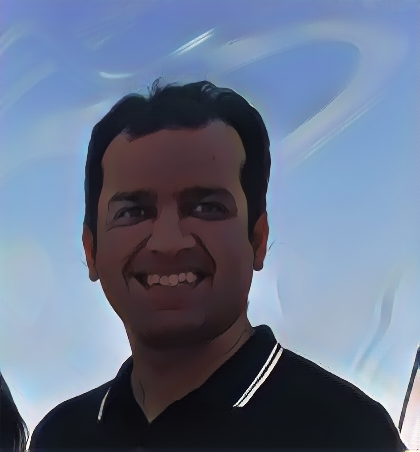

In [82]:
%%time
output450 = transform(models, "Shinkai", path ,load_size=450)
output450